In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
#파생변수 만들기

train_data['dioxide'] = train_data['total sulfur dioxide']/train_data['free sulfur dioxide']
train_data['alcohol_density'] = train_data['alcohol']/train_data['density']
train_data['total acidity']=train_data['fixed acidity']+train_data['volatile acidity']

test_data['dioxide'] = test_data['total sulfur dioxide']/test_data['free sulfur dioxide']
test_data['alcohol_density'] = test_data['alcohol']/test_data['density']
test_data['total acidity']=test_data['fixed acidity']+test_data['volatile acidity']

sugar 지우기,free 지우기,acdity 두개 파생 만들기,pH 지우기,dioxide 두개 지우기


In [4]:
train_data_del=train_data.drop(columns=['residual sugar','pH','free sulfur dioxide','total sulfur dioxide','fixed acidity'])
test_data_del=test_data.drop(columns=['residual sugar','pH','free sulfur dioxide','total sulfur dioxide','fixed acidity'])

In [5]:
train_data_del.head()

,index,quality,volatile acidity,citric acid,chlorides,density,sulphates,alcohol,type,dioxide,alcohol_density,total acidity
0,0,5,0.695,0.06,0.042,0.99432,0.44,10.2,white,9.333333,10.258267,6.295
1,1,5,0.610,0.14,0.067,0.99690,0.59,9.5,red,4.200000,9.529542,9.410
2,2,5,0.210,0.39,0.057,0.99176,0.52,10.9,white,6.571429,10.990562,8.110
3,3,6,0.210,0.31,0.046,0.99390,0.50,10.8,white,3.724138,10.866284,7.210
4,4,6,0.400,0.26,0.059,0.99550,0.43,10.9,white,5.562500,10.949272,8.200


<ipython-input-6-eb0deb728980>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = train_data_del.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')


<Axes: >

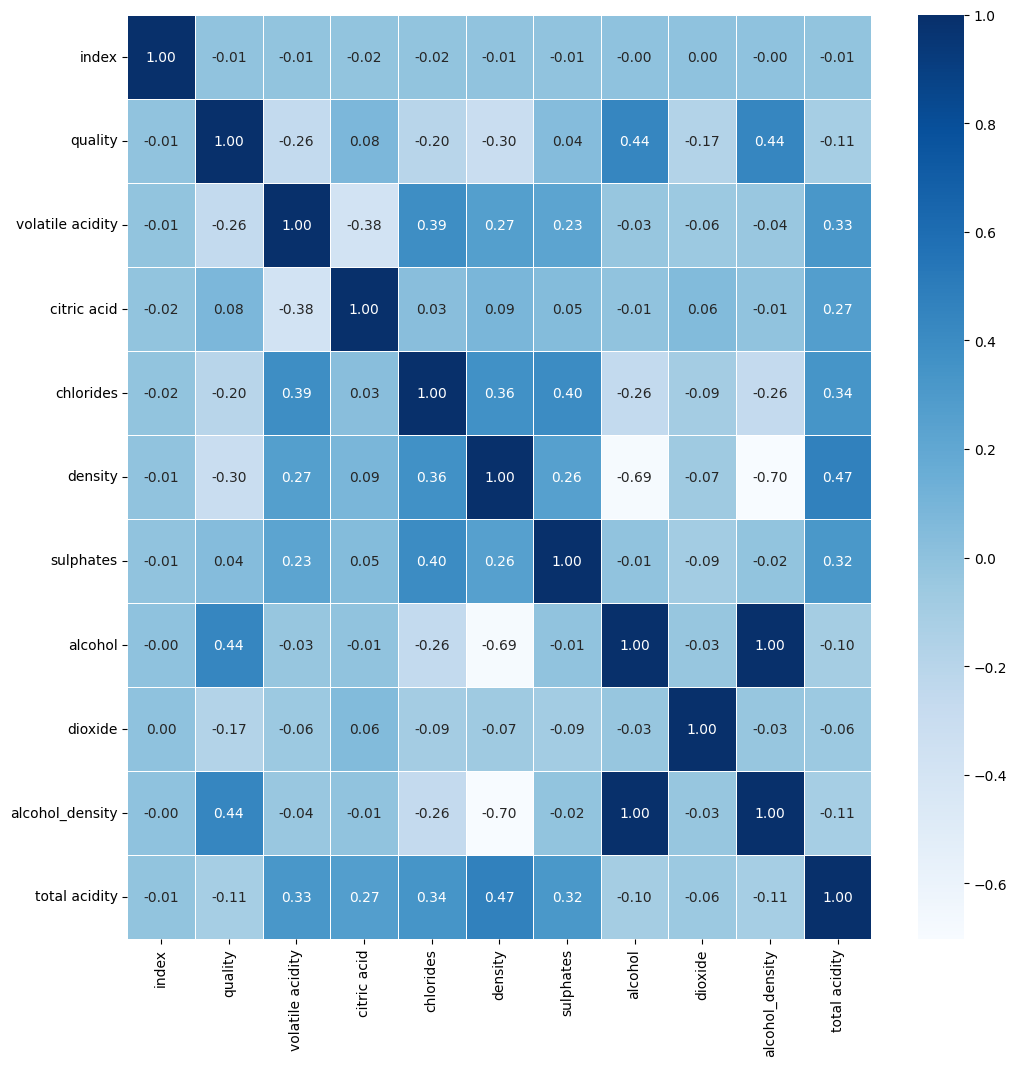

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train_data_del.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [7]:
encoding_map = {'red': 0, 'white': 1}
train_data_del['type_encoded'] = train_data_del['type'].map(encoding_map)
test_data_del['type_encoded'] = test_data['type'].map(encoding_map)

In [8]:
train_data_del.head()

,index,quality,volatile acidity,citric acid,chlorides,density,sulphates,alcohol,type,dioxide,alcohol_density,total acidity,type_encoded
0,0,5,0.695,0.06,0.042,0.99432,0.44,10.2,white,9.333333,10.258267,6.295,1
1,1,5,0.610,0.14,0.067,0.99690,0.59,9.5,red,4.200000,9.529542,9.410,0
2,2,5,0.210,0.39,0.057,0.99176,0.52,10.9,white,6.571429,10.990562,8.110,1
3,3,6,0.210,0.31,0.046,0.99390,0.50,10.8,white,3.724138,10.866284,7.210,1
4,4,6,0.400,0.26,0.059,0.99550,0.43,10.9,white,5.562500,10.949272,8.200,1


In [9]:
test_data_del.head()

,index,volatile acidity,citric acid,chlorides,density,sulphates,alcohol,type,dioxide,alcohol_density,total acidity,type_encoded
0,0,0.31,0.48,0.043,0.99380,0.38,11.6,white,6.636364,11.672369,9.31,1
1,1,0.43,0.58,0.070,1.00040,0.49,9.0,red,2.666667,8.996401,13.73,0
2,2,0.28,0.27,0.040,0.99480,0.69,9.4,white,4.068182,9.449136,6.78,1
3,3,0.15,0.39,0.043,0.99480,0.47,10.0,white,7.571429,10.052272,7.35,1
4,4,0.26,0.26,0.019,0.99041,0.47,11.8,white,3.063830,11.914258,7.06,1


In [10]:
train_data_del.shape

(5497, 13)

In [11]:
test_data_del.shape

(1000, 12)

In [12]:
x_train=train_data_del.drop(columns=['quality','index','type'])
y_train=train_data_del['quality']

x_test=test_data_del.drop(columns=['index','type'])

In [13]:
x_train

,volatile acidity,citric acid,chlorides,density,sulphates,alcohol,dioxide,alcohol_density,total acidity,type_encoded
0,0.695,0.06,0.042,0.99432,0.44,10.2,9.333333,10.258267,6.295,1
1,0.610,0.14,0.067,0.99690,0.59,9.5,4.200000,9.529542,9.410,0
2,0.210,0.39,0.057,0.99176,0.52,10.9,6.571429,10.990562,8.110,1
3,0.210,0.31,0.046,0.99390,0.50,10.8,3.724138,10.866284,7.210,1
4,0.400,0.26,0.059,0.99550,0.43,10.9,5.562500,10.949272,8.200,1
...,...,...,...,...,...,...,...,...,...,...
5492,0.150,0.29,0.029,0.99320,0.39,10.1,6.400000,10.169150,7.850,1
5493,0.180,0.36,0.034,0.99074,0.51,11.0,4.269231,11.102812,6.480,1
5494,0.150,0.34,0.035,0.99096,0.72,11.3,3.000000,11.403084,7.950,1
5495,0.410,0.31,0.042,0.99195,0.41,10.5,5.611111,10.585211,7.010,1


In [14]:
y_train

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

In [15]:
x_test.head()

,volatile acidity,citric acid,chlorides,density,sulphates,alcohol,dioxide,alcohol_density,total acidity,type_encoded
0,0.31,0.48,0.043,0.99380,0.38,11.6,6.636364,11.672369,9.31,1
1,0.43,0.58,0.070,1.00040,0.49,9.0,2.666667,8.996401,13.73,0
2,0.28,0.27,0.040,0.99480,0.69,9.4,4.068182,9.449136,6.78,1
3,0.15,0.39,0.043,0.99480,0.47,10.0,7.571429,10.052272,7.35,1
4,0.26,0.26,0.019,0.99041,0.47,11.8,3.063830,11.914258,7.06,1


In [16]:
x_train.head()

,volatile acidity,citric acid,chlorides,density,sulphates,alcohol,dioxide,alcohol_density,total acidity,type_encoded
0,0.695,0.06,0.042,0.99432,0.44,10.2,9.333333,10.258267,6.295,1
1,0.610,0.14,0.067,0.99690,0.59,9.5,4.200000,9.529542,9.410,0
2,0.210,0.39,0.057,0.99176,0.52,10.9,6.571429,10.990562,8.110,1
3,0.210,0.31,0.046,0.99390,0.50,10.8,3.724138,10.866284,7.210,1
4,0.400,0.26,0.059,0.99550,0.43,10.9,5.562500,10.949272,8.200,1


In [26]:

!pip uninstall pycaret

Found existing installation: pycaret 3.0.4
Uninstalling pycaret-3.0.4:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pycaret-3.0.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pycaret/*
Proceed (Y/n)? Y
  Successfully uninstalled pycaret-3.0.4


In [27]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=d2ebe64a36f65bb10f192dee3565bc86fc64ca532fa52a2138af84664c25024d
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 63.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [25]:
set = setup(data = x_train,  target = y_train)
top3 = compare_models(n_select = 3)
blender = blend_models(top3)

NameError: ignored

In [ ]:
Y_pred=blender.predict(x_test)

In [ ]:
submission_blend = pd.DataFrame({'index': range(1000), 'quality': Y_pred})

In [ ]:
submission_blend.to_csv('submission_blend.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
pip install keras-tuner

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import keras_tuner
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train.shape[1]))

    for i in range(hp.Int('num_layers', 1, 12)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Keras Tuner를 사용하여 최적의 하이퍼파라미터 탐색
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='wine_quality'
)

tuner.search(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# 최적의 모델과 하이퍼파라미터 출력
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Model Summary:")
print(best_model.summary())

In [ ]:
hp = keras_tuner.HyperParameters()

def build_model(hp):

    model = keras.Sequential()

    # Hidden Layers
    for i in range(hp.Int('num_layers', 1, 12)):
        model.add(
            keras.layers.Dense(
                units = hp.Int('units', min_value=32, max_value=512, step=32),
                activation = hp.Choice('activation', ['relu', 'tanh'])))

    # Dropout Layer
    if hp.Boolean("dropout"):
        model.add(
            keras.layers.Dropout(rate=0.25))

    # Output Layer
    model.add(
        keras.layers.Dense(units=1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))